# Image preprocessing

In [4]:
import data_reader
import dataset

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [5]:
gdc_data_path = "D:/data/WSI/GDC/gdc_download_20220615_080352.004457"
gtex_data_path = "D:/data/WSI/GTEx/PAAD"
tcia_data_path = "D:/data/WSI/TCIA/PDA"

gdc_sample_sheet = pd.read_csv("D:/data/WSI/GDC/sample_sheet.tsv", sep="\t") # Sample Sheet data for TS samples
gtex_sample_sheet = pd.read_csv("D:/data/WSI/GTEx/GTEx Portal.csv", header=0)
tcia_sample_sheet = pd.read_csv("D:/data/WSI/TCIA/cohort.csv", sep=",")

PREPROCESS = True
DATA_SET_NAME = "train_256_tcia_mac"

In [6]:
SPLITS = [1,2,3,3,4,5,6,7,8,9]
if PREPROCESS == True: # Choosing to preprocess the data or not
    
    for SPLIT in SPLITS:
        print(f"Processing SPLIT: {SPLIT}")

        SPLIT_NAME = DATA_SET_NAME + f"_SPLIT{SPLIT}"

        case_id = open(f"C:\\Users\\Alejandro\\Desktop\\heterogeneous-data\\splits\\testsplit{SPLIT}.txt", "r").read().split()
        tcia_case_id = open(f"C:\\Users\\Alejandro\\Desktop\\heterogeneous-data\\splits\\tcia_testsplit{SPLIT}.txt", "r").read().split()

        # Obtaining the files for the cases in the used split
        gdc_file_ids  = [gdc_sample_sheet["File ID"][idx] for idx, case in enumerate(gdc_sample_sheet["Case ID"]) if (case in case_id)] #GDC
        gtex_file_ids  = [gtex_sample_sheet["Tissue Sample ID"][idx][:-1]+'5' for idx, case in enumerate(gtex_sample_sheet["Subject ID"]) if (case in case_id)] #GTEx
        tcia_file_ids = [tcia_sample_sheet["Slide_ID"][idx] for idx, case in enumerate(tcia_sample_sheet["Case_ID"]) if (case in tcia_case_id)] #TCIA

        paths = [tcia_data_path + '\\' + file_id  + ".svs"for file_id in tcia_file_ids] #[gdc_data_path + "\\" + file_id for file_id in gdc_file_ids] +  # All case folders paths
        
        data_r = data_reader.Data_reader(formats=[".svs"])

        data_set = data_r.read_data(
                paths,
                patch_size=256,
                name=SPLIT_NAME)

train_set = dataset.PatchDataset([], [], [])

for SPLIT in SPLITS:
    SPLIT_NAME = DATA_SET_NAME + f"_SPLIT{SPLIT}"
    
    print(f"Loading split: {SPLIT}")
    X_, y_, n , ids = data_reader.read_lmdb(f"D:/data/WSI/patches/{SPLIT_NAME}")

    train_set.inputs.extend(X_)
    train_set.labels.extend(y_)
    train_set.case_ids.extend(ids)

print(n)
print(f"Patches : {len(train_set)}\n")

X, y, case_id = train_set.inputs, train_set.labels, train_set.case_ids


Processing SPLIT: 1


 53%|█████▎    | 33/62 [1:06:02<2:13:54, 277.04s/it]c:\Users\Alejandro\anaconda3\envs\openslide\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\Users\Alejandro\anaconda3\envs\openslide\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
c:\Users\Alejandro\Desktop\heterogeneous-data\src\WSI\normalization.py:45: RuntimeWarning: Degrees of freedom <= 0 for slice
  eigvals, eigvecs = np.linalg.eigh(np.cov(ODhat.T))
c:\Users\Alejandro\anaconda3\envs\openslide\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
c:\Users\Alejandro\anaconda3\envs\openslide\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Error  <class 'numpy.linalg.LinAlgError'> occurred.
Error  <class 'numpy.linalg.LinAlgError'> occurred.


 94%|█████████▎| 58/62 [3:01:16<12:29, 187.41s/it]  

Error  <class 'numpy.linalg.LinAlgError'> occurred.


100%|██████████| 62/62 [3:12:08<00:00, 185.95s/it]


29594
50.0
29594
Processing SPLIT: 2


100%|██████████| 56/56 [5:16:00<00:00, 338.58s/it]   


27300
50.0
27300
Processing SPLIT: 3


 52%|█████▏    | 29/56 [1:33:50<1:29:13, 198.26s/it]c:\Users\Alejandro\anaconda3\envs\openslide\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\Users\Alejandro\anaconda3\envs\openslide\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
c:\Users\Alejandro\Desktop\heterogeneous-data\src\WSI\normalization.py:45: RuntimeWarning: Degrees of freedom <= 0 for slice
  eigvals, eigvecs = np.linalg.eigh(np.cov(ODhat.T))
c:\Users\Alejandro\anaconda3\envs\openslide\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
c:\Users\Alejandro\anaconda3\envs\openslide\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Error  <class 'numpy.linalg.LinAlgError'> occurred.
Error  <class 'numpy.linalg.LinAlgError'> occurred.


 96%|█████████▋| 54/56 [5:31:14<13:12, 396.26s/it]  

Error  <class 'numpy.linalg.LinAlgError'> occurred.


100%|██████████| 56/56 [5:38:43<00:00, 362.92s/it]


27881
50.0
27881
Processing SPLIT: 3


  7%|▋         | 4/56 [28:25<8:10:44, 566.24s/it]c:\Users\Alejandro\anaconda3\envs\openslide\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\Users\Alejandro\anaconda3\envs\openslide\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
c:\Users\Alejandro\Desktop\heterogeneous-data\src\WSI\normalization.py:45: RuntimeWarning: Degrees of freedom <= 0 for slice
  eigvals, eigvecs = np.linalg.eigh(np.cov(ODhat.T))
c:\Users\Alejandro\anaconda3\envs\openslide\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
c:\Users\Alejandro\anaconda3\envs\openslide\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Error  <class 'numpy.linalg.LinAlgError'> occurred.


 91%|█████████ | 51/56 [6:05:57<32:18, 387.61s/it]   

Error  <class 'numpy.linalg.LinAlgError'> occurred.


 96%|█████████▋| 54/56 [6:30:42<15:20, 460.15s/it]

Error  <class 'numpy.linalg.LinAlgError'> occurred.
Error  <class 'numpy.linalg.LinAlgError'> occurred.


100%|██████████| 56/56 [6:38:46<00:00, 427.26s/it]


27881
50.0
27881
Processing SPLIT: 4


100%|██████████| 60/60 [3:57:36<00:00, 237.61s/it]  


26374
50.0
26374
Processing SPLIT: 5


100%|██████████| 62/62 [6:14:55<00:00, 362.83s/it]   


30172
50.0
30172
Processing SPLIT: 6


100%|██████████| 56/56 [4:25:04<00:00, 284.01s/it]   


26227
50.0
26227
Processing SPLIT: 7


100%|██████████| 44/44 [2:56:58<00:00, 241.32s/it]  


18963
50.0
18963
Processing SPLIT: 8


100%|██████████| 56/56 [4:29:04<00:00, 288.30s/it]  


26957
50.0
26957
Processing SPLIT: 9


100%|██████████| 50/50 [4:58:09<00:00, 357.79s/it]   


23642
50.0
23642
Loading split: 1
Read lmdb
29594
Loading split: 2
Read lmdb
27300
Loading split: 3
Read lmdb
27881
Loading split: 3
Read lmdb
27881
Loading split: 4
Read lmdb
26374
Loading split: 5
Read lmdb
30172
Loading split: 6
Read lmdb
26227
Loading split: 7
Read lmdb
18963
Loading split: 8
Read lmdb
26957
Loading split: 9
Read lmdb
23642
47284
Patches : 264991



In [4]:
print(len(y))
print(len(X))
#print(case_id)

15686
15686


In [ ]:
#negative = [i for i in case_id if "11" in(i)]
#print(negative)

example_idx = case_id.index("X_TCGA-2J-AABU-01Z_13")

print(example_idx)

plt.imshow(X[example_idx].reshape(512, 512, 3))
print(y[example_idx])

ValueError: 'X_TCGA-2J-AABU-01Z_13' is not in list

In [ ]:

for SPLIT in range(10):
    train_set = dataset.PatchDataset([], [], [])
    SPLIT_NAME = DATA_SET_NAME + f"_SPLIT{SPLIT}"
    
    print(f"Loading split: {SPLIT}")
    X_, y_, n , ids = data_reader.read_lmdb(f"D:/data/WSI/patches/{SPLIT_NAME}")

    train_set.inputs.extend(X_)
    train_set.labels.extend(y_)
    train_set.case_ids.extend(ids)

    X, y, case_id = train_set.inputs, train_set.labels, train_set.case_ids

    negative = [(i[0]==1) for i in y].count(True)
    positive = [(i[1]==1) for i in y].count(True)
    #read = [(i[2]==1) for i in y].count(True)

    print(f"Number of patches in split {SPLIT}: ", len(y))
    print("Percentage of negative patches: ", negative/len(y))

Loading split: 0
Read lmdb
8209
Number of patches in split 0:  8209
Percentage of negative patches:  0.6156657327323669
Loading split: 1
Read lmdb
8207
Number of patches in split 1:  8207
Percentage of negative patches:  0.5285731692457658
Loading split: 2
Read lmdb
9777
Number of patches in split 2:  9777
Percentage of negative patches:  0.48859568374757084
Loading split: 3
Read lmdb
9243
Number of patches in split 3:  9243
Percentage of negative patches:  0.5094666233906741
Loading split: 4
Read lmdb
8730
Number of patches in split 4:  8730
Percentage of negative patches:  0.5371134020618556
Loading split: 5
Read lmdb
8520
Number of patches in split 5:  8520
Percentage of negative patches:  0.5497652582159624
Loading split: 6
Read lmdb
8464
Number of patches in split 6:  8464
Percentage of negative patches:  0.5450141776937618
Loading split: 7
Read lmdb
8236
Number of patches in split 7:  8236
Percentage of negative patches:  0.5426177756192326
Loading split: 8
Read lmdb
7714
Number 

Number of patches:  318
Percentage of negative patches:  0.5062893081761006


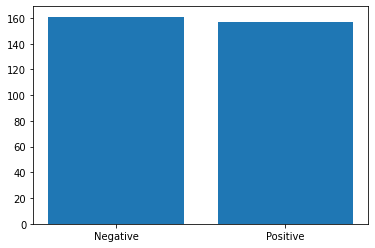

In [ ]:
negative = [(i[0]==1) for i in y].count(True)
positive = [(i[1]==1) for i in y].count(True)

plt.bar(["Negative", "Positive"], [negative, positive])

print("Number of patches: ", len(y))
print("Percentage of negative patches: ", negative/len(y))

[[[238 189 216]
  [239 195 213]
  [241 204 218]
  ...
  [231 143 176]
  [234 151 180]
  [237 157 184]]

 [[244 194 218]
  [243 200 218]
  [241 210 222]
  ...
  [234 143 178]
  [235 145 179]
  [237 146 179]]

 [[235 175 203]
  [236 187 212]
  [236 207 223]
  ...
  [239 159 190]
  [237 151 184]
  [235 146 180]]

 ...

 [[120 109 150]
  [100  82 138]
  [120 114 161]
  ...
  [229 161 192]
  [229 166 197]
  [230 166 196]]

 [[210 198 222]
  [195 175 207]
  [206 195 219]
  ...
  [225 157 192]
  [225 162 197]
  [233 169 196]]

 [[246 231 236]
  [241 236 235]
  [242 229 246]
  ...
  [223 155 192]
  [223 161 197]
  [234 171 196]]]
(512, 512, 3)


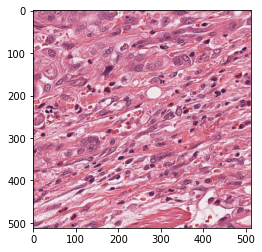

In [ ]:
idx = 200

#print(y[idx])

print(X[0])

print(X[idx].shape)

plt.imshow(X[idx].reshape(512, 512, 3))